In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2025-09-01T10-16-14.846Z-2025-08-04T06-36-56.823Z-2025-07-03T16-51-30.203Z-bollywood - bollywood.csv')
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [5]:
# 1. How many records are present in the dataset? Print the metadata information of the dataset.

# Number of records
print("Number of records:", len(df))

# Metadata information
print("\nMetadata Information:")
print(df.info())




Number of records: 149

Metadata Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


In [6]:
# 2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

# Count movies in each genre
genre_counts = df['Genre'].value_counts()


# Print genre with highest number of releases
print("\nGenre with highest number of releases:")
print(f"{genre_counts.idxmax()} → {genre_counts.max()} movies")

# Print counts sorted in descending order
print("Movies released in each genre (sorted):\n")
print(genre_counts)


Genre with highest number of releases:
Comedy → 36 movies
Movies released in each genre (sorted):

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64


In [7]:
# Q3.How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

genre_release_crosstab = pd.crosstab(df['Genre'], df['ReleaseTime'])

print("Movies released in each genre across different release times:\n")
print(genre_release_crosstab)


Movies released in each genre across different release times:

ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


In [8]:
# Q4. Month with maximum number of movie releases

# First detect the release date column (update if different in your dataset)
release_col = 'Release Date'  # change this if column name is slightly different

# Convert release date to datetime
df[release_col] = pd.to_datetime(df[release_col], errors='coerce')

# Extract month name
df['Month'] = df[release_col].dt.month_name()

# Count releases per month
month_counts = df['Month'].value_counts()

print("Movies released per month:\n")
print(month_counts)

# Month with maximum releases
print("\nMonth with maximum releases:")
print(f"{month_counts.idxmax()} → {month_counts.max()} movies")

Movies released per month:

Month
January      20
March        19
May          18
July         16
February     16
April        11
June         10
September    10
November     10
October       9
August        8
December      2
Name: count, dtype: int64

Month with maximum releases:
January → 20 movies


/tmp/ipython-input-1408503151.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[release_col] = pd.to_datetime(df[release_col], errors='coerce')


In [9]:
# Q5. Month with most high-budget (≥25 crore) movie releases

# Ensure Budget column is numeric
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')

# Filter high budget movies (≥ 25 crore)
high_budget = df[df['Budget'] >= 25]

# Count per month
high_budget_month_counts = high_budget['Month'].value_counts()

print("High-budget movies released per month:\n")
print(high_budget_month_counts)

# Month with maximum high-budget releases
print("\nMonth with maximum high-budget releases:")
print(f"{high_budget_month_counts.idxmax()} → {high_budget_month_counts.max()} movies")


High-budget movies released per month:

Month
February     9
January      8
August       7
March        7
November     6
July         6
June         5
September    5
April        4
October      4
May          3
December     2
Name: count, dtype: int64

Month with maximum high-budget releases:
February → 9 movies


In [10]:
# Q6. Which are the top 10 movies with maximum return on investment (ROI)?

# Ensure Budget and BoxOfficeCollection columns are numeric
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
df['BoxOfficeCollection'] = pd.to_numeric(df['BoxOfficeCollection'], errors='coerce')

# Calculate ROI
# To avoid division by zero for movies with Budget = 0, replace 0 with NaN temporarily
df['Budget'] = df['Budget'].replace(0, pd.NA)
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']

# Drop rows where Budget was 0 or ROI is NaN (due to NaN Budget)
df = df.dropna(subset=['ROI'])

# Sort by ROI in descending order and get the top 10
top_10_roi_movies = df.sort_values(by='ROI', ascending=False).head(10)

print("Top 10 movies with maximum Return on Investment (ROI):\n")
display(top_10_roi_movies[['MovieName', 'Budget', 'BoxOfficeCollection', 'ROI']])

Top 10 movies with maximum Return on Investment (ROI):



,MovieName,Budget,BoxOfficeCollection,ROI
64,Aashiqui 2,12,110.0,8.166667
89,PK,85,735.0,7.647059
132,Grand Masti,35,298.0,7.514286
135,The Lunchbox,10,85.0,7.500000
87,Fukrey,5,36.2,6.240000
58,Mary Kom,15,104.0,5.933333
128,Shahid,6,40.0,5.666667
37,Humpty Sharma Ki Dulhania,20,130.0,5.500000
101,Bhaag Milkha Bhaag,30,164.0,4.466667
115,Chennai Express,75,395.0,4.266667


In [11]:
# Q7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

# Calculate the average ROI for each ReleaseTime
average_roi_by_release_time = df.groupby('ReleaseTime')['ROI'].mean()

print("Average ROI for different release times:\n")
print(average_roi_by_release_time)

Average ROI for different release times:

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64


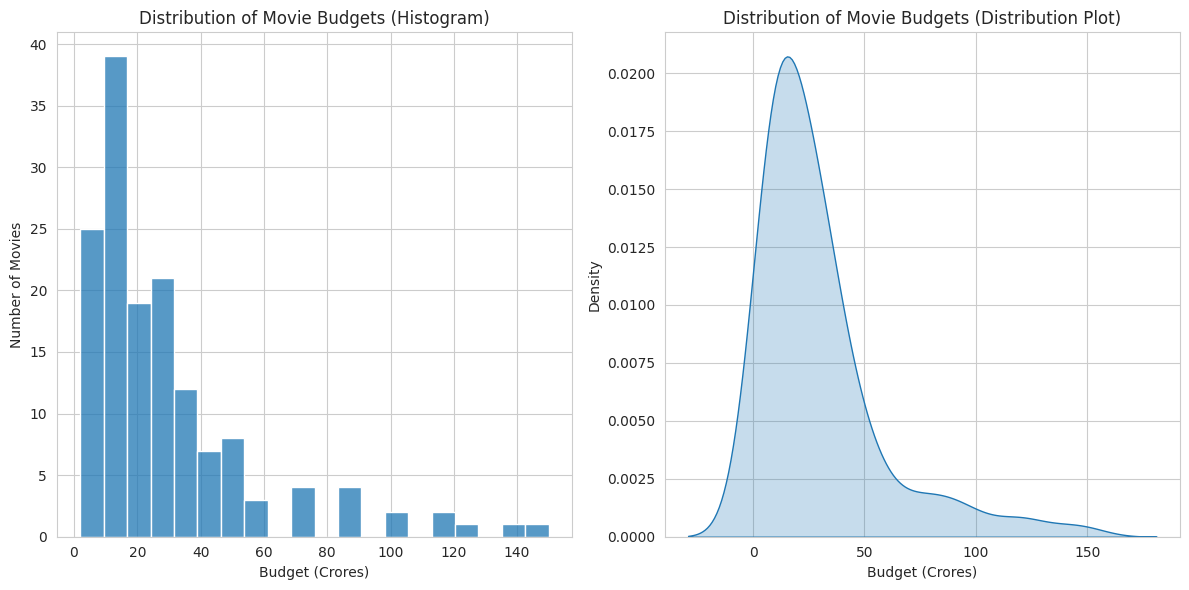


Interpretation:
Observe the shape of the histogram and distribution plot.
- A peak on the left side (lower budget values) suggests most movies are low-budget.
- A peak on the right side (higher budget values) suggests most movies are high-budget.
- If the distribution is skewed to the right, it indicates there are a few high-budget movies, while the majority are low-budget.
- If the distribution is more symmetrical around a higher value, it would indicate a higher concentration of high-budget movies.


In [12]:
# Q8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Budget column is numeric
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')

# Drop rows with NaN values in Budget if any resulted from coercion
df_cleaned = df.dropna(subset=['Budget'])

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and axes for the plots
plt.figure(figsize=(12, 6))

# Histogram of movie budgets
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df_cleaned['Budget'], kde=False, bins=20)
plt.title('Distribution of Movie Budgets (Histogram)')
plt.xlabel('Budget (Crores)')
plt.ylabel('Number of Movies')

# Distribution plot of movie budgets
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.kdeplot(df_cleaned['Budget'], fill=True)
plt.title('Distribution of Movie Budgets (Distribution Plot)')
plt.xlabel('Budget (Crores)')
plt.ylabel('Density')


plt.tight_layout()
plt.show()

# Interpretation guidance:
print("\nInterpretation:")
print("Observe the shape of the histogram and distribution plot.")
print("- A peak on the left side (lower budget values) suggests most movies are low-budget.")
print("- A peak on the right side (higher budget values) suggests most movies are high-budget.")
print("- If the distribution is skewed to the right, it indicates there are a few high-budget movies, while the majority are low-budget.")
print("- If the distribution is more symmetrical around a higher value, it would indicate a higher concentration of high-budget movies.")

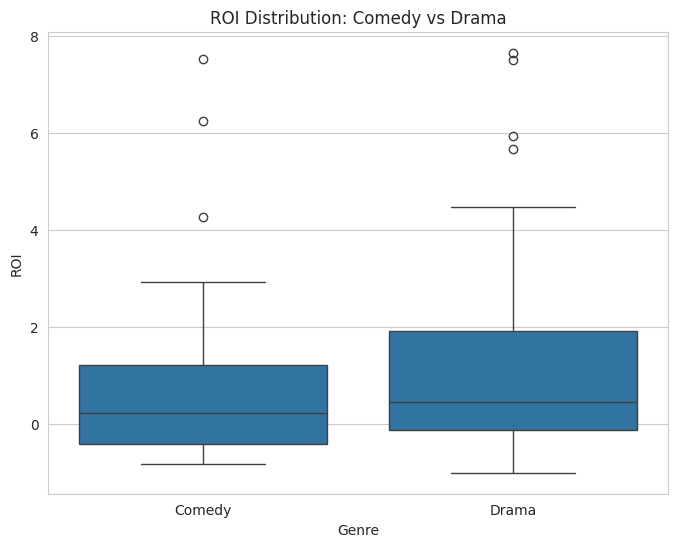

Average ROI:
 Genre
Comedy    0.788394
Drama     1.357455
Name: ROI, dtype: float64

Median ROI:
 Genre
Comedy    0.236061
Drama     0.466667
Name: ROI, dtype: float64

Conclusion:
Drama has higher ROI (avg/median)


In [13]:
# Q9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

# Filter dataset for Comedy and Drama
df_cd = df[df['Genre'].isin(['Comedy', 'Drama'])]

# Boxplot for ROI comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='ROI', data=df_cd)
plt.title('ROI Distribution: Comedy vs Drama')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.show()

# Calculate average and median ROI
avg_roi = df_cd.groupby('Genre')['ROI'].mean()
med_roi = df_cd.groupby('Genre')['ROI'].median()

print("Average ROI:\n", avg_roi)
print("\nMedian ROI:\n", med_roi)

# Conclusion
print("\nConclusion:")
print("Comedy has higher ROI (avg/median)" if (avg_roi['Comedy'] > avg_roi['Drama']) and (med_roi['Comedy'] > med_roi['Drama'])
      else "Drama has higher ROI (avg/median)" if (avg_roi['Comedy'] < avg_roi['Drama']) and (med_roi['Comedy'] < med_roi['Drama'])
      else "Results are mixed: one genre is higher on average, the other on median.")

In [14]:
# Q10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

# Ensure the columns are numeric
df['BoxOfficeCollection'] = pd.to_numeric(df['BoxOfficeCollection'], errors='coerce')
df['YoutubeLikes'] = pd.to_numeric(df['YoutubeLikes'], errors='coerce')

# Calculate correlation
correlation = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print(f"Correlation between Box Office Collection and YouTube Likes: {correlation:.2f}")

# Interpret correlation
if correlation > 0:
    print("Positive correlation: More YouTube Likes usually mean higher Box Office Collection.")
elif correlation < 0:
    print("Negative correlation: More YouTube Likes usually mean lower Box Office Collection.")
else:
    print("No correlation: YouTube Likes and Box Office Collection are not related.")

# Strength of correlation
if abs(correlation) >= 0.7:
    print("Strong correlation")
elif abs(correlation) >= 0.3:
    print("Moderate correlation")
else:
    print("Weak or negligible correlation")


Correlation between Box Office Collection and YouTube Likes: 0.68
Positive correlation: More YouTube Likes usually mean higher Box Office Collection.
Moderate correlation


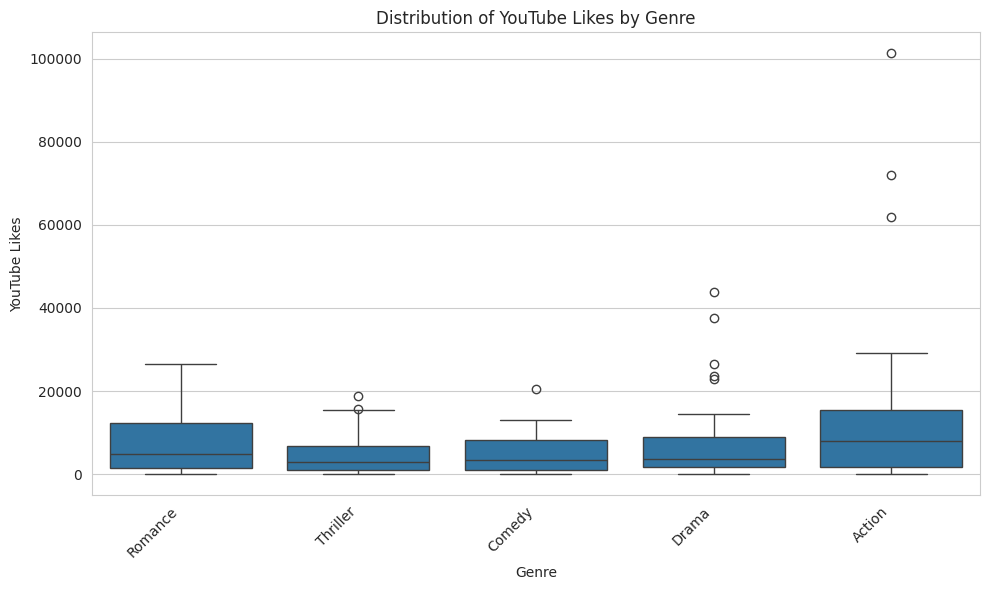


Median YouTube Likes by Genre:

Genre
Action      7951.0
Romance     4853.0
Drama       3656.0
Comedy      3365.0
Thriller    2974.0
Name: YoutubeLikes, dtype: float64

Average YouTube Likes by Genre:

Genre
Action      16744.708333
Drama        7973.628571
Romance      7089.640000
Thriller     4941.793103
Comedy       4784.722222
Name: YoutubeLikes, dtype: float64


In [15]:
# Q11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure YoutubeLikes column is numeric
df['YoutubeLikes'] = pd.to_numeric(df['YoutubeLikes'], errors='coerce')

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))

# Create a box plot of YoutubeLikes by Genre
sns.boxplot(x='Genre', y='YoutubeLikes', data=df)
plt.title('Distribution of YouTube Likes by Genre')
plt.xlabel('Genre')
plt.ylabel('YouTube Likes')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Optional: Calculate and print the median or average YouTube likes per genre
print("\nMedian YouTube Likes by Genre:\n")
print(df.groupby('Genre')['YoutubeLikes'].median().sort_values(ascending=False))

print("\nAverage YouTube Likes by Genre:\n")
print(df.groupby('Genre')['YoutubeLikes'].mean().sort_values(ascending=False))

Correlation Matrix:



,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


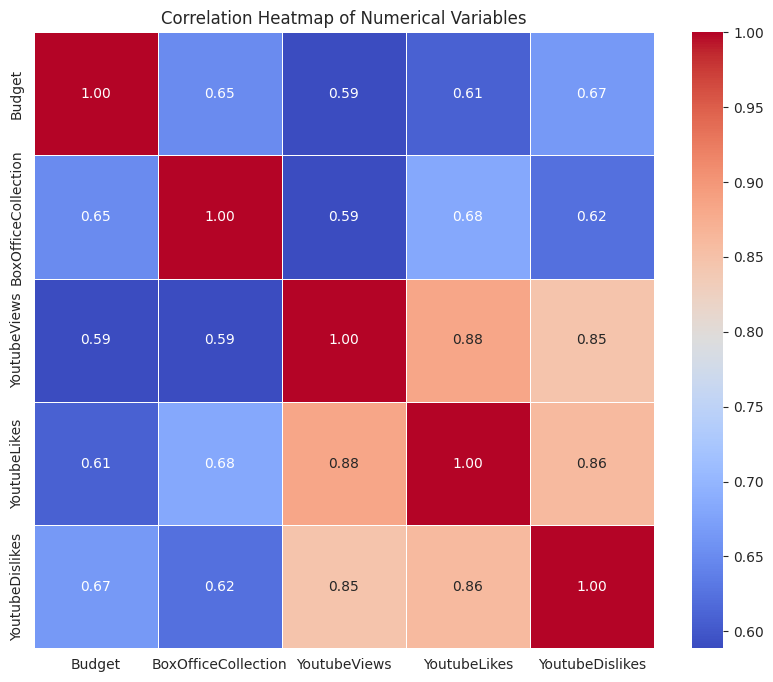


Interpretation:
Values near 1 or -1 indicate strong positive or negative correlation.
Values near 0 indicate weak or negligible correlation.
Check heatmap colors to quickly identify highly correlated pairs (ignore diagonal).


In [16]:
# Q12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.


# Select relevant numerical columns
numerical_cols = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
df_numerical = df[numerical_cols].apply(pd.to_numeric, errors='coerce').dropna()

# Calculate correlation matrix
correlation_matrix = df_numerical.corr()
print("Correlation Matrix:\n")
display(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Simple interpretation
print("\nInterpretation:")
print("Values near 1 or -1 indicate strong positive or negative correlation.")
print("Values near 0 indicate weak or negligible correlation.")
print("Check heatmap colors to quickly identify highly correlated pairs (ignore diagonal).")
